<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/1st_week(Ch.4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1. 로지스틱 회귀

## 데이터 준비하기

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


Species 열과 나머지 열을 서로 분리하기

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 입력 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
# 타깃 데이터
fish_target = fish['Species'].to_numpy()

## 머신러닝 준비

### 훈련 세트와 테스트 세트로 분류

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# StandardScaler을 사용해 훈련 세트와 테스트 세트 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## KNN

In [ ]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 타깃 데이터를 만들 때, fish['Species']를 사용해 만들었기 때문에, 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다. → 타깃 데이터에 2개 이상의 클래스 포함: **다중 분류**

  - 주의할 점: 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳순으로 매겨진다.

In [ ]:
print(pd.unique(fish['Species']))
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


* predict() 메서드는 타깃값으로 예측을 출력

In [ ]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 테스트 세트에 있는 처음 5개의 샘플에 대한 확률
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba() 메서드의 출력 순서는 classes_ 속성과 같다.

* kneighbors() 메서드의 입력은 2차원 배열이어야 하고, 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용. 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열 생성!

In [ ]:
# 네 번째 샘플의 최근점 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

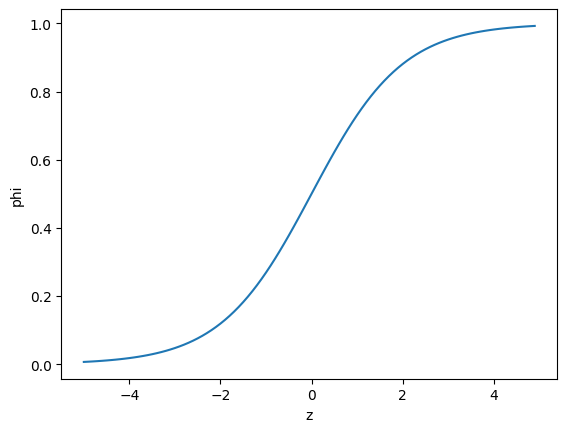

In [ ]:
# 시그모이드 함수 그리기(시그모이드 함수는 로지스틱 분포의 누적확률분포 함)
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행

이진 분류를 위해서는 True, False 값을 전달하여 행을 선택하는 **불리언 인덱싱**을 사용한다.
*불리언 인덱싱: 배열이나 데이터프레임에서 조건식을 이용해 True에 해당하는 값만 선택하는 기법

In [ ]:
 char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
 print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # train_target == 'Bream'은 'Bream'은 True이고 나머지는 False를 반환. OR 연산자인 | 를 사용하였으므로 Bream과 Smelt일 경우 True이고 나머지는 False로 나온다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 5개 샘플의 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


* 첫 번째 열이 음성 클래스(0)에 대한 확률이고, 두 번째 열이 양성 클래스(1)에 대한 확률이다.

In [ ]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.
$$z＝-0.404×(Weight)-0.576×(Length)-0.663×(Diagonal)-1.013×(Height)-0.732×(Width)-2.161$$
각 계수의 순서는 fish_input 데이터프레임의 순서와 같다.

In [ ]:
# 처음 5개 샘플의 z 값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
# z 값을 시그모이드 함수에 대입하여 확률 계산
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


*  decision_function() 메서드는 양성 클래스에 대한 z 값 반환.

### 로지스틱 회귀로 다중 분류 수행하기

- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용. max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제. C라는 매개변수로 규제를 조절하며 기본값은 1. C의 값이 작을수록 규제가 커짐

In [ ]:
# LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 5개 샘플의 예측 확률 출력
proba = (lr.predict_proba(test_scaled[:5]))
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중 분류는 클래스마다 z 값을 하나씩 계산하여 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다. <br> 5개의 특성을 사용하므로 coef_ 배열의 열은 5, 클래스가 7개이므로 coef_ 배열의 행은 7

In [ ]:
# 5개 샘플에 대한 7개의 z 값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [ ]:
# 소프트맥스 함수를 이용해 각 z 값을 확률로 계산
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 시그모이드 함수는 하나의 선형 방정식의 출력값을 0~1 사이로 압축
- 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 설정(각 열의 합은 1)

# 4-2. 확률적 경사 하강법

### 확률적 경사 하강법

**확률적 경사 하강법(SGD, Stochastic Gradient Descent)**은 전체 데이터가 아니라 랜덤하게 선택한 하나의 샘플을 사용하여 가중치를 업데이트하는 방법이다.(하나하나씩 점진적으로 학습해나간다.)
계산량이 적어 큰 데이터셋에서도 빠르게 학습할 수 있지만, 노이즈가 많아 수렴 속도가 느리거나 최적해 근처에서 진동할 수 있다.
이를 보완하기 위해 미니배치 SGD(여러 샘플 사용)나 모멘텀, Adam과 같은 최적화 기법이 자주 사용된다.

### 에포크

전체 훈련 데이터를 한 번 모두 학습하는 과정

### 모멘텀과 Adam



확률적 경사 하강법(SGD)의 단점을 보완하기 위해 사용되는 대표적인 두 가지 최적화 기법!


#### 1. 모멘텀(Momentum)
- **SGD의 단점을 보완하는 방법으로, 속도(이전 업데이트 방향)를 고려하여 최적화하는 기법**  
-  기존 SGD는 **경사 하강을 하면서 진동**(안정적으로 수렴 X)할 수 있는데, 모멘텀을 사용하면 **이전 방향을 기억하면서 더 부드럽게 수렴**함.  
-  물리학에서 **공이 언덕을 내려올 때 가속도가 붙는 원리**와 비슷함.  

##### 📌 모멘텀 업데이트 식
$[
v_t = \beta v_{t-1} - \eta \nabla J(\theta)
]$

$[
\theta = \theta + v_t
]$

- $( v_t $) = 속도(velocity), 이전 기울기 방향을 누적  
- $( \beta $) = 모멘텀 계수 (보통 0.9 사용)  
- $( \eta $) = 학습률  
- $( \nabla J(\theta) $) = 현재 손실 함수의 기울기  

##### ✅ 장점
- 진동을 줄이고 더 빠르게 수렴할 수 있음  
- 지그재그 움직임을 완화하여 학습 안정성 증가  

#### 2. Adam (Adaptive Moment Estimation)
- **모멘텀 + RMSProp을 결합한 최적화 기법으로, 각 파라미터에 대해 적응적인 학습률을 적용하는 방법**  
-  학습률을 자동 조절하여 **SGD보다 빠르고 안정적으로 최적점을 찾음**  

##### 📌 Adam 업데이트 식
1. **모멘텀(1차 순간추정)** → 이전 기울기 방향을 반영<br>
   $[
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla J(\theta)
   $]
2. **RMSProp (2차 순간추정, 기울기의 제곱 평균)** → 변화가 큰 방향의 학습률 감소 (기울기가 큰 방향으로 너무 많이 이동하면 진동이 심해지고 최적점 근처에서 불안정해질 수 있음.) <br>
   $[
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla J(\theta))^2
   $]
3. **바이어스 보정 후 학습률 조절**<br>
   $[
   \theta = \theta - \frac{\eta}{\sqrt{v_t} + \epsilon} m_t
   $]

- $( \beta_1 $) = 1차 모멘텀 계수 (보통 0.9)  
- $( \beta_2 $) = 2차 모멘텀 계수 (보통 0.999)  
- $( \epsilon $) = 0으로 나누는 것을 방지하는 작은 값  

##### ✅ 장점
- **적응형 학습률**: 기울기가 큰 방향의 학습률을 낮추고, 작은 방향에서는 증가  
- **빠르고 안정적인 최적화** → 딥러닝에서 가장 널리 사용됨! 🚀  

#### 🎯 비교 요약

| 알고리즘 | 특징 | 장점 | 단점 |
|----------|------|------|------|
| **SGD** | 하나의 샘플로 업데이트 | 간단하고 빠름 | 진동이 크고 수렴 속도 느림 |
| **Momentum** | 속도(이전 업데이트 방향) 고려 | 진동 감소, 더 빠른 수렴 | 최적 학습률 조정 필요 |
| **Adam** | 모멘텀 + RMSProp 결합 | 학습률 자동 조절, 빠르고 안정적 | 과적합 가능, 일부 문제에서 성능 저하 |

#### ✅ 결론
- **모멘텀**: SGD보다 더 부드럽게 최적점을 찾아가도록 도와줌.  
- **Adam**: 가장 널리 쓰이는 최적화 기법으로, 학습률을 자동 조정하여 빠르고 안정적으로 학습 가능.  

🚀 **딥러닝에서는 Adam이 기본적으로 가장 많이 사용되고, 특정 상황에서는 모멘텀을 추가적으로 활용하기도 함!**


### 손실 함수

**손실 함수(Loss Function)**는 머신러닝 모델이 예측한 값과 실제 정답(타깃) 간의 차이를 측정하는 함수다.  
즉, **모델이 얼마나 잘못 예측했는지(오차)를 수치로 나타내는 지표**라고 볼 수 있다.

#### 손실 함수의 역할
1. **오차(예측값과 실제값 차이)를 측정**  
2. **경사 하강법(Gradient Descent) 등 최적화 알고리즘이 최소화할 목표를 제공**  
3. **모델 학습의 방향을 결정**  

#### 1. 회귀 문제에서 손실 함수
📌 **회귀 문제(Regression)**에서는 예측값이 연속적인 숫자이므로,  
예측값과 실제값의 차이를 계산하는 방식이 주로 사용된다.<br>
✅ 대표적인 회귀 손실 함수

| 손실 함수 | 수식 | 특징 |
|-----------|----------------|------------------------------|
| **평균 제곱 오차 (MSE, Mean Squared Error)** | \( MSE = \frac{1}{n} \sum (y - \hat{y})^2 \) | 가장 많이 사용됨. 큰 오차에 더 민감함. |
| **평균 절대 오차 (MAE, Mean Absolute Error)** | \( MAE = \frac{1}{n} \sum |y - \hat{y}| \) | 이상치(Outlier)에 덜 민감함. |
| **허버 손실 (Huber Loss)** | MSE와 MAE를 결합 | 이상치 영향을 줄이면서도 MSE처럼 작동 |

#### 2. 분류 문제에서 손실 함수
📌 **분류 문제(Classification)**에서는 예측값이 확률이므로,  
확률을 기반으로 손실을 계산하는 방식이 주로 사용된다. <br>

✅ 대표적인 분류 손실 함수

| 손실 함수 | 수식 | 특징 |
|-----------|----------------|------------------------------|
| **이진 교차 엔트로피(Binary Cross Entropy)** | \( BCE = -\frac{1}{n} \sum [y \log \hat{y} + (1 - y) \log (1 - \hat{y})] \) | 이진 분류(0 또는 1)에서 사용 |
| **범주형 교차 엔트로피(Categorical Cross Entropy)** | \( CCE = -\sum y_i \log \hat{y}_i \) | 다중 클래스 분류에서 사용 |
| **스패스 교차 엔트로피(Sparse Categorical Cross Entropy)** | 변형된 CCE | 클래스 인덱스만 입력받아 연산 최적화 |


#### 🎯 정리
- **손실 함수는 모델의 예측 오류를 측정하는 함수**  
- **회귀 문제**: MSE, MAE 등이 주로 사용됨  
- **분류 문제**: 교차 엔트로피(BCE, CCE) 등이 주로 사용됨  
- 머신러닝/딥러닝에서 **손실 함수를 최소화하는 것이 목표!** 🚀  

📌 **즉, 손실 함수는 모델이 학습을 잘하도록 방향을 정해주는 핵심 요소다!**

또한, 기술적으로 손실 함수는 미분 가능해야한다. 정확도라는 개념은 [0,1]사이에서 연속적이기 때문이다.

### SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
# 입력 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
# 타깃 데이터
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트로 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# StandardScaler을 사용해 훈련 세트와 테스트 세트 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# SGDClassifier 임포트
from sklearn.linear_model import SGDClassifier

In [ ]:
# SGDClassifier 실행
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # loss='log_loss'로 지정하여 로지스틱 손실 함수 지정, max_iter로 수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
# 다중 분류일 경우 loss='log_loss'로 지정하면 클래스마다 이진 분류 모델 생성. ex) 도미 or False, 빙어 or False

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 1 에포크 더 실행하기
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.85


### 에포크와 과대/과소적합

- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습: 과소적합일 가능성
- 에포크 횟수가 많으면 모델이 훈련 세트만 학습: 과대적합일 가능성

In [ ]:
# 에포크별 점수 기록용 리스트 준비
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
# 300번의 에포크 실행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

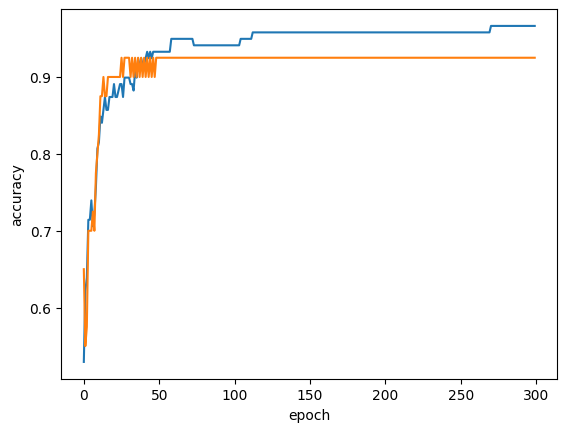

In [ ]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

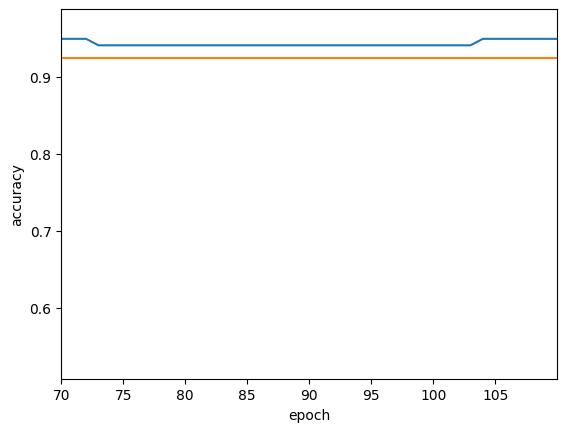

In [ ]:
#70~110 사이 확대
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(70,110)
plt.xticks(np.arange(70, 110, 5))
plt.show()

In [ ]:
# 에포크 100으로 설정
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


가장 적절한 에포크 횟수: 34 (train-test 차이: 0.0078)


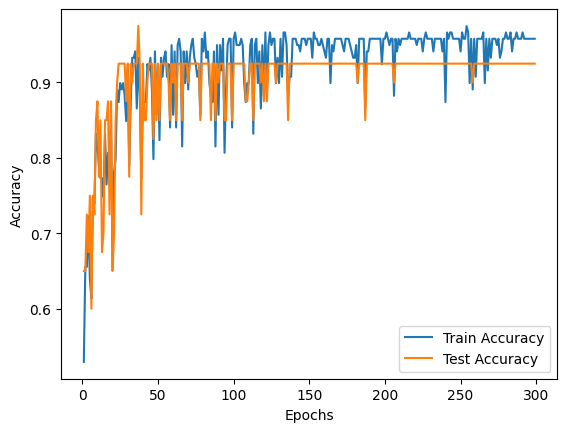

In [ ]:
# 에포크 100으로 설정하는게 최선이 아니길래...

# 에포크 범위 설정
epoch_range = range(1, 300)

# 최적의 에포크 찾기
min_diff = float('inf')
best_epoch = None

train_scores = []
test_scores = []

for epoch in epoch_range:
    # 모델 초기화 및 학습
    sc = SGDClassifier(loss='log_loss', max_iter=epoch, tol=None, random_state=42)
    sc.fit(train_scaled, train_target)

    # 점수 계산
    train_score = sc.score(train_scaled, train_target)
    test_score = sc.score(test_scaled, test_target)

    # 조건: train 점수가 test 점수보다 높고, 과소적합 방지 (train_score > test_score)
    if train_score > test_score and train_score >= 0.925:
        score_diff = abs(train_score - test_score)

        # train과 test 점수 차이가 가장 작은 경우 갱신
        if score_diff < min_diff:
            min_diff = score_diff
            best_epoch = epoch

    train_scores.append(train_score)
    test_scores.append(test_score)

# 결과 출력
print(f"가장 적절한 에포크 횟수: {best_epoch} (train-test 차이: {min_diff:.4f})")

# 시각화
plt.plot(epoch_range, train_scores, label="Train Accuracy")
plt.plot(epoch_range, test_scores, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [ ]:
# 에포크 34으로 설정
sc = SGDClassifier(loss='log_loss', max_iter=34, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 힌지 손실을 사용해 같은 반복 횟수 동안 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


- loss 매개변수의 기본값은 'hinge'로 'hinge'는 손실 함수의 일부분.

- loss='hinge' → **SVM(서포트 벡터 머신)**에서 사용, 결정 경계 기반 분류, 출력값은 +1 또는 -1
- loss='log_loss' → 로지스틱 회귀에서 사용, 확률 기반 분류, 출력값은 0~1(확률)

- 결정 경계 기반 분류: 특정 기준(마진)을 설정해 데이터를 어느 한쪽(-1 or 1)으로 분류
- 확률 기반 분류: 예측 값이 0~1 사이의 확률값을 반환